In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BTC-USD_stock_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [3]:
df.shape

(2836, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2.836000e+03
mean,23241.696396,23767.721452,22681.085905,23262.039342,23262.039342,2.287903e+10
std,19766.306933,20199.763573,19290.278300,19773.829052,19773.829052,1.888917e+10
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,7277.492554,7435.214966,7113.698975,7277.790405,7277.790405,7.730409e+09
50%,16601.785156,16804.058594,16284.663574,16603.525391,16603.525391,2.026586e+10
75%,37470.646484,38601.096680,36421.379883,37493.499023,37493.499023,3.252037e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2836 non-null   object 
 1   Open       2836 non-null   float64
 2   High       2836 non-null   float64
 3   Low        2836 non-null   float64
 4   Close      2836 non-null   float64
 5   Adj Close  2836 non-null   float64
 6   Volume     2836 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.2+ KB


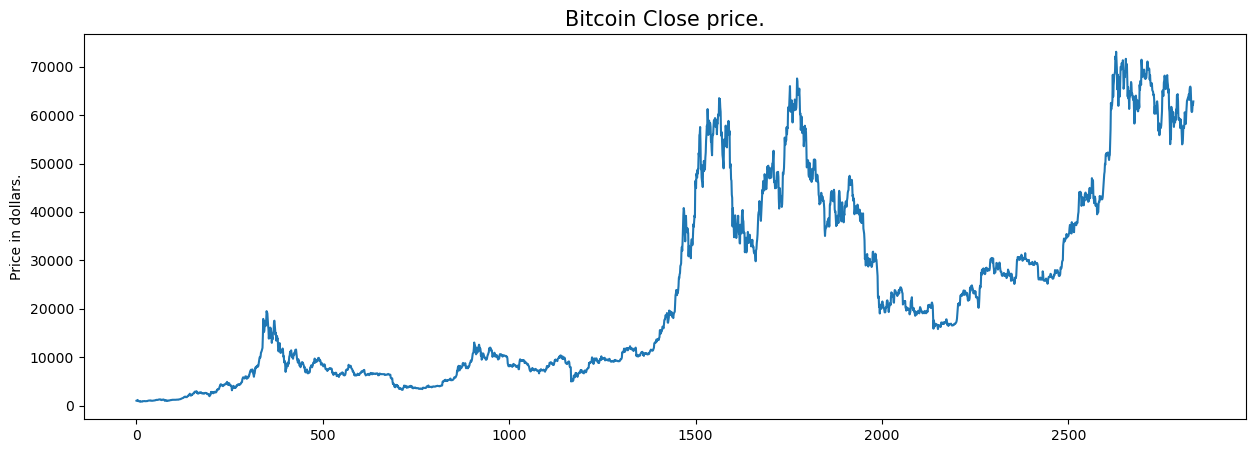

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [7]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((2836, 7), (2836, 7))

In [8]:
df = df.drop(['Adj Close'], axis=1)

In [9]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

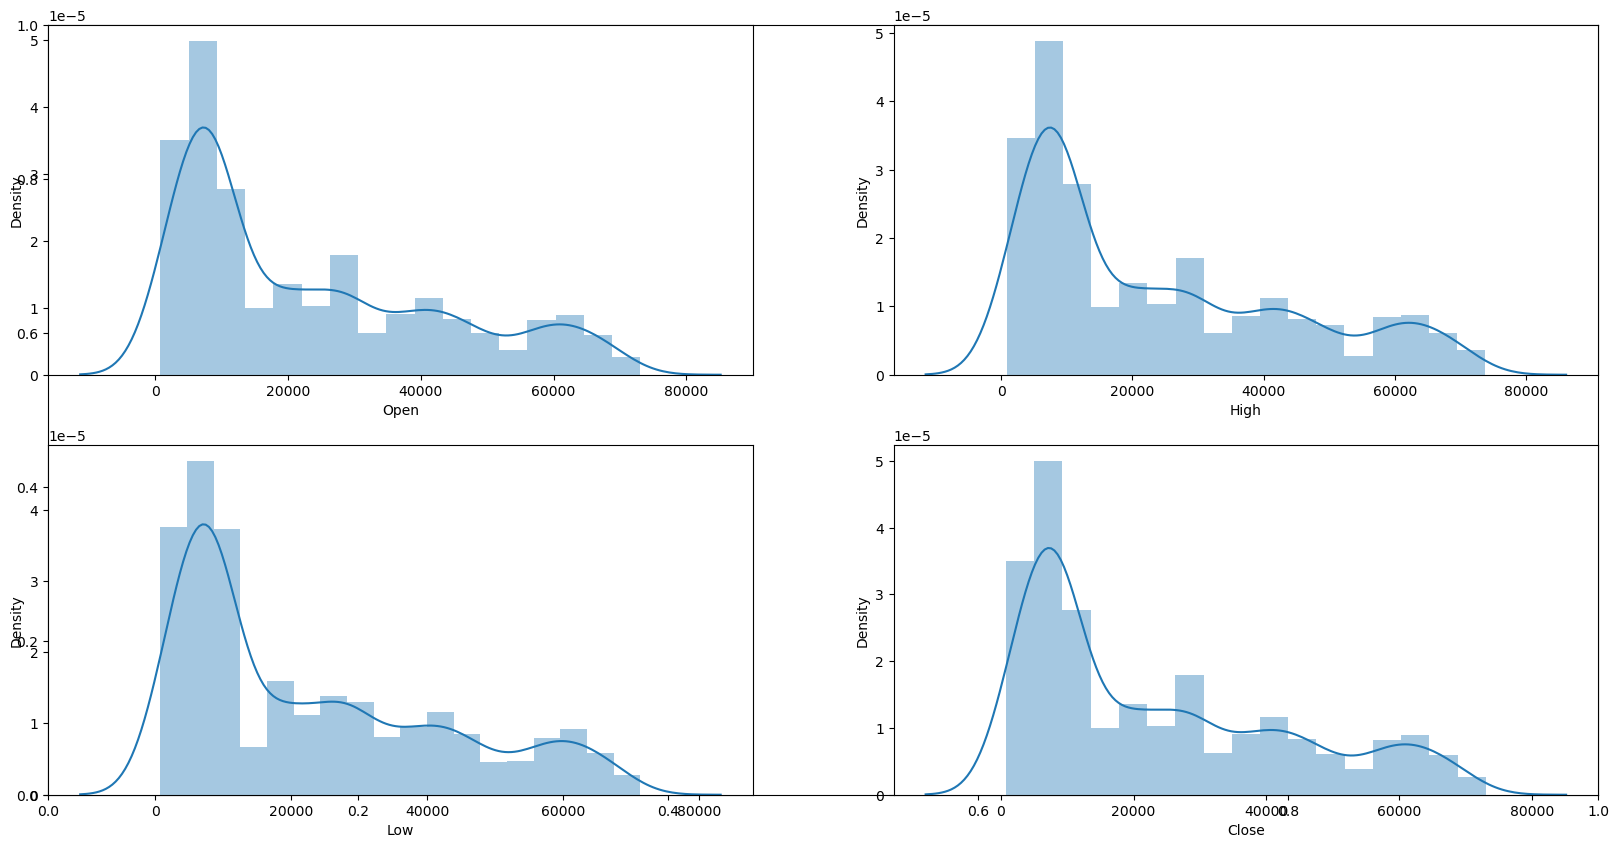

In [10]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

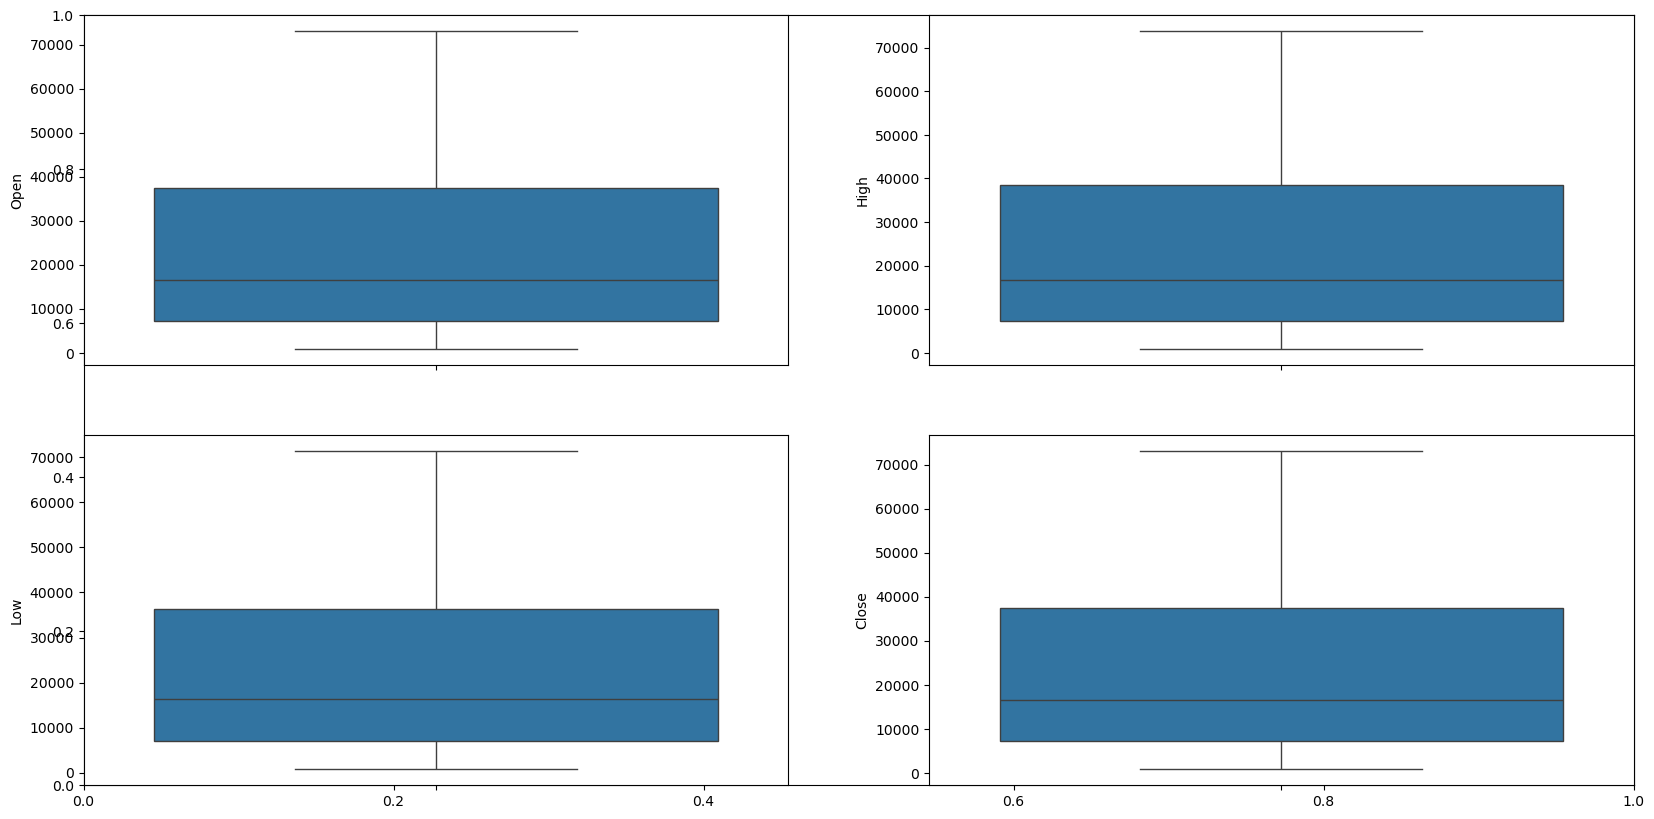

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

In [12]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date']) 

df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008,2017,1,1
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,2017,1,2
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,2017,1,3
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,2017,1,4
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,2017,1,5


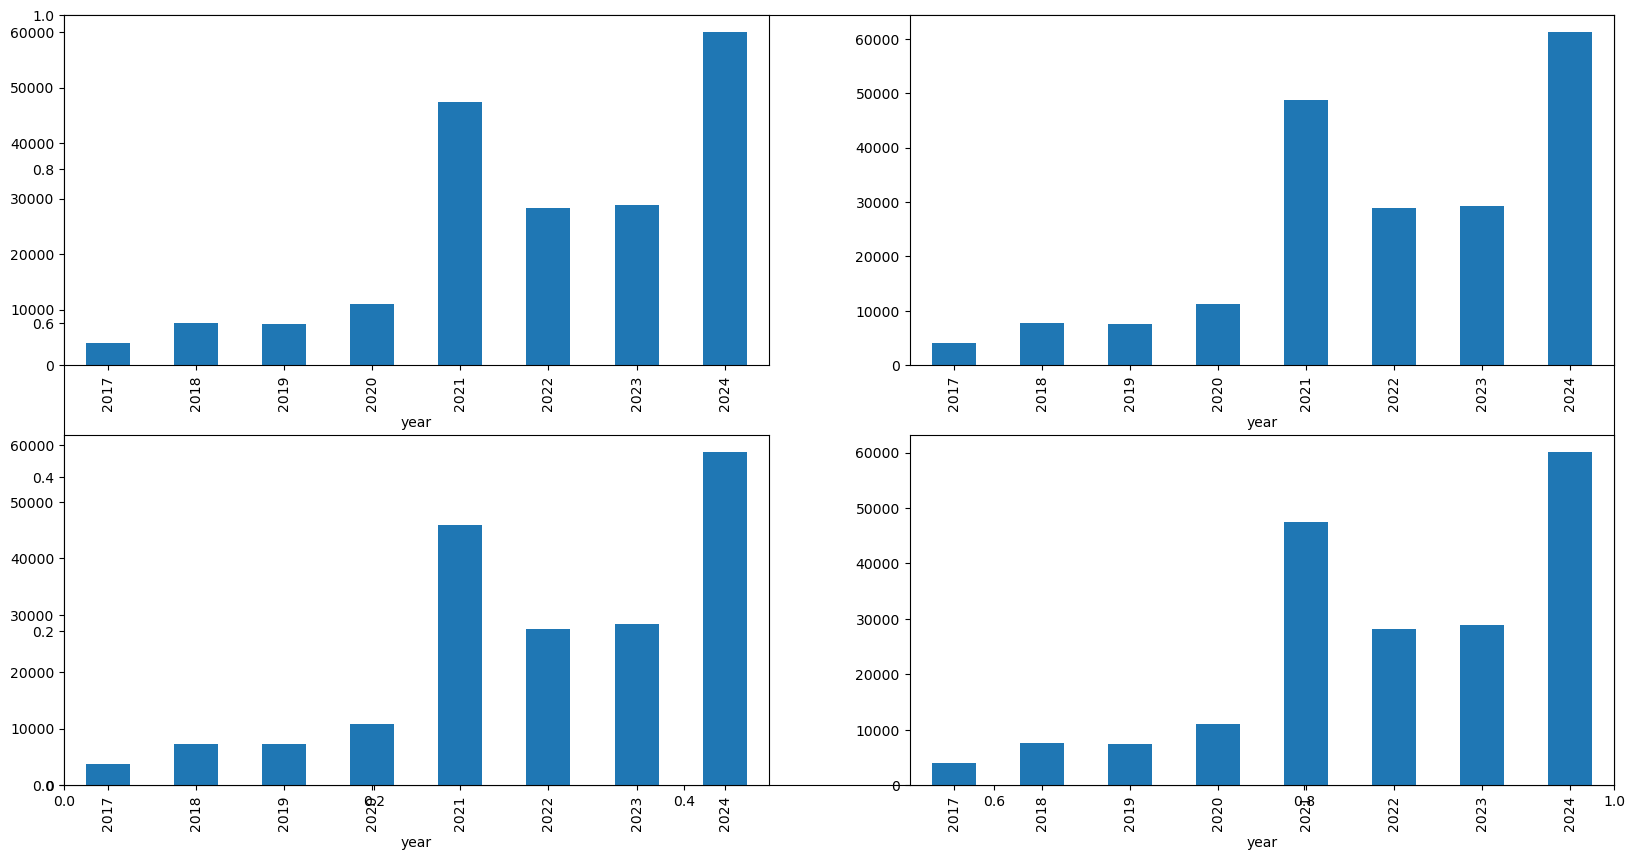

In [13]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [14]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008,2017,1,1,0
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,2017,1,2,0
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,2017,1,3,0
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,2017,1,4,0
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,2017,1,5,0


In [15]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

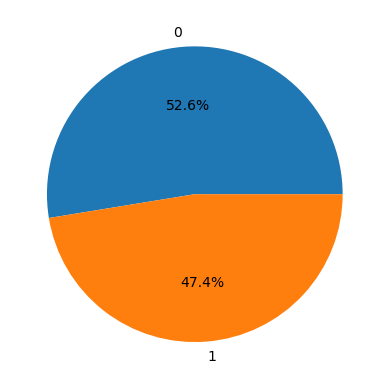

In [16]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

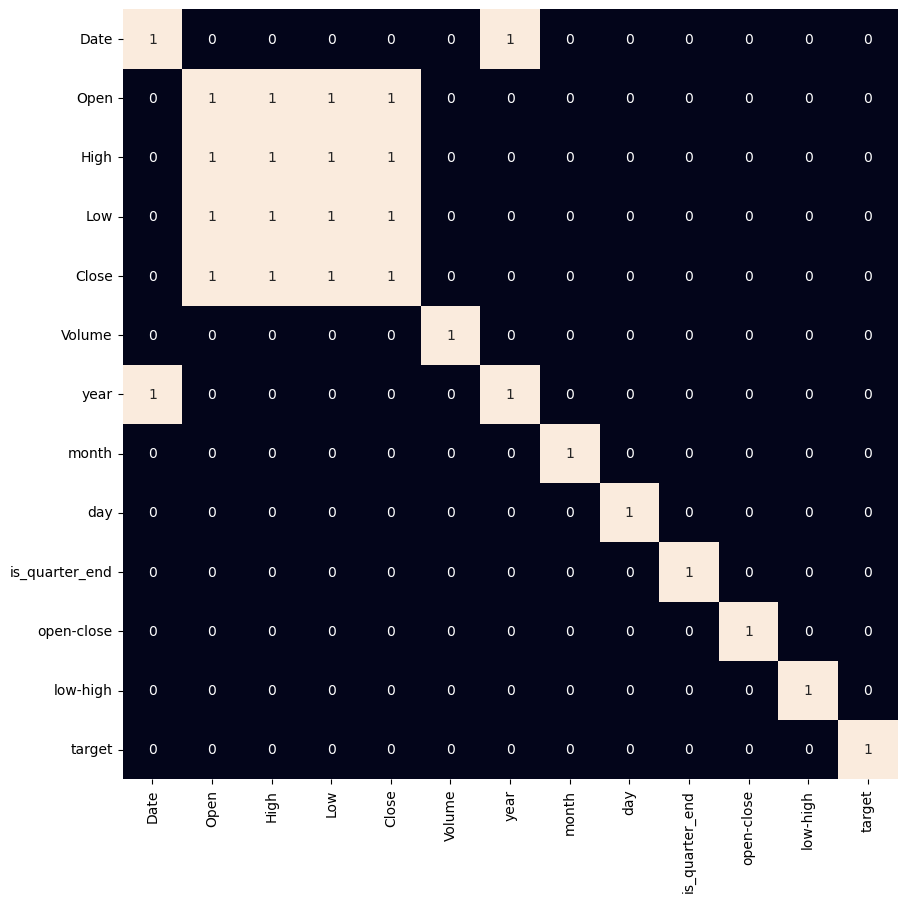

In [17]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly correlated features only so, we will visualize our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [18]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)
#We do not use train test split, rather use the first 70% data to train and last 30% to test
X_train, X_valid, Y_train, Y_valid = X_train, X_valid, Y_train, Y_valid = features[:len(features)//7],features[len(features)//7:],target[:len(features)//7],target[len(features)//7:]

In [19]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5809327846364882
Validation Accuracy :  0.5041635509460953

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4383986180968349
Validation Accuracy :  0.5086048074213755

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Traini

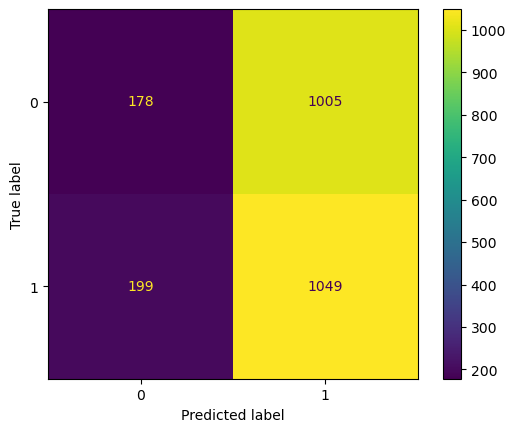

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()